In [2]:
import pandas as pandas
import numpy as numpy
import seaborn as seaborn
import matplotlib.pyplot as pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay


In [17]:
heart=pandas.read_csv("./heart_cleveland_upload.csv")

In [7]:
#Analisis exploratorio
heart.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
#age: age in years
#sex: sex (1 = male; 0 = female)
#cp: chest pain type
#-- Value 0: typical angina
#-- Value 1: atypical angina
#-- Value 2: non-anginal pain
#-- Value 3: asymptomatic
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#chol: serum cholestoral in mg/dl
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg: resting electrocardiographic results
#-- Value 0: normal
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#thalach: maximum heart rate achieved
#exang: exercise induced angina (1 = yes; 0 = no)
#oldpeak = ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment
#-- Value 0: upsloping
#-- Value 1: flat
#-- Value 2: downsloping
#ca: number of major vessels (0-3) colored by flourosopy
#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
#and the label
#condition: 0 = no disease, 1 = disease


<Axes: xlabel='sex'>

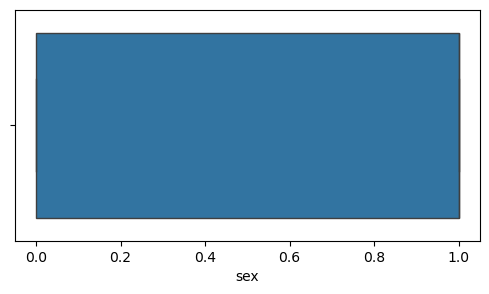

In [9]:
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["sex"])

<Axes: xlabel='condition'>

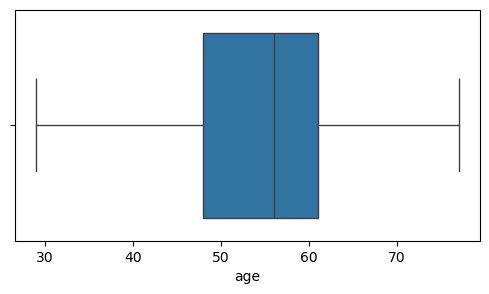

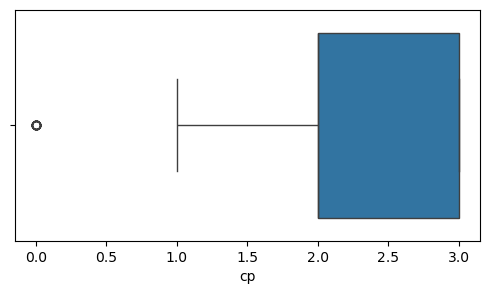

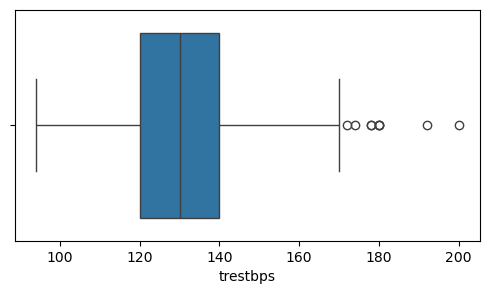

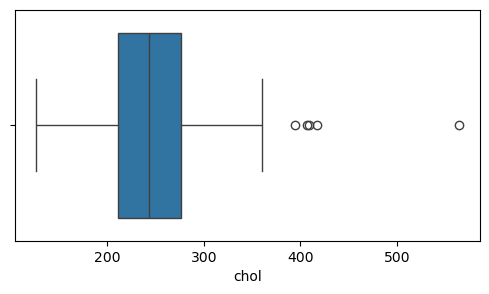

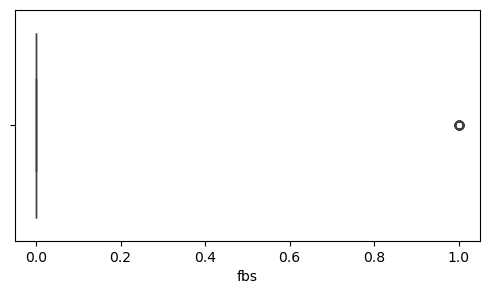

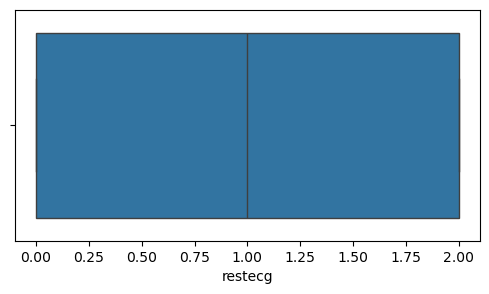

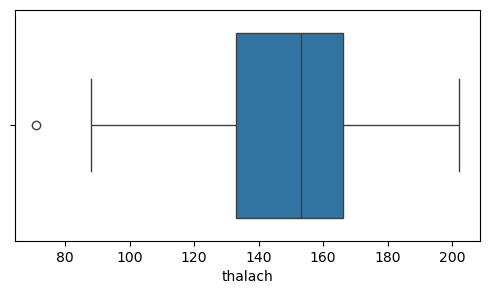

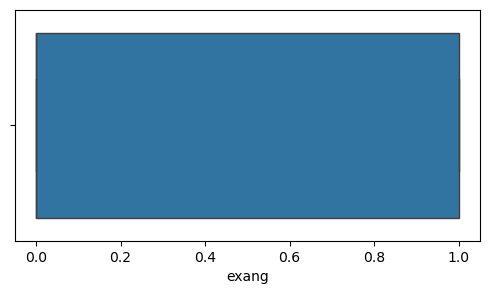

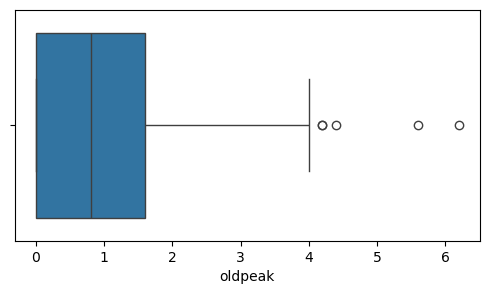

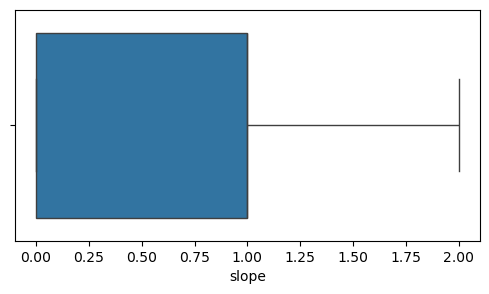

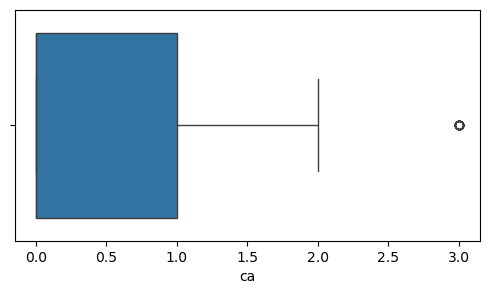

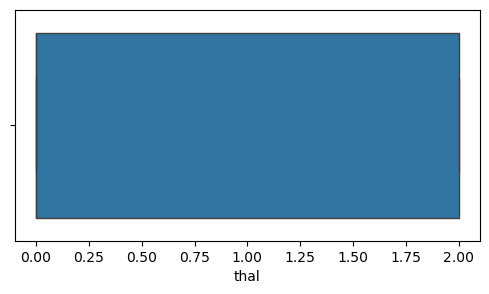

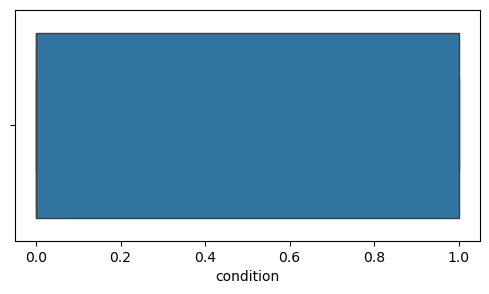

In [10]:
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["age"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["cp"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["trestbps"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["chol"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["fbs"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["restecg"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["thalach"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["exang"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["oldpeak"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["slope"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["ca"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["thal"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["condition"])

In [11]:
#Tratamiento de los datos,
heart=heart[heart["oldpeak"]<=4]
heart=heart[heart["thalach"]>=80]
heart=heart[heart["chol"]<360]
heart=heart[heart["trestbps"]<=170]
heart=heart[heart["cp"]>0.0]
heart.drop_duplicates(inplace=True)


<Axes: xlabel='condition'>

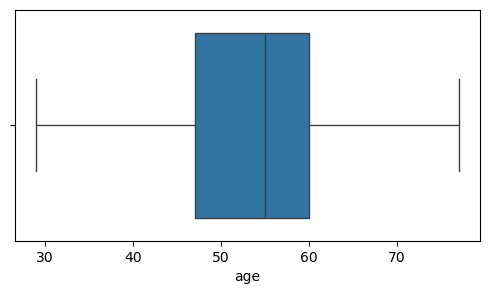

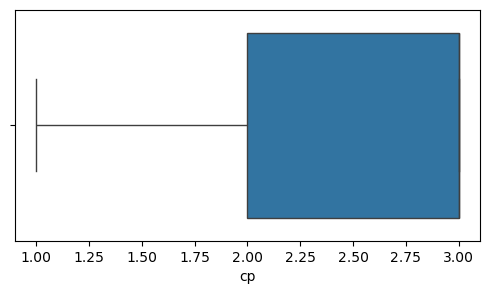

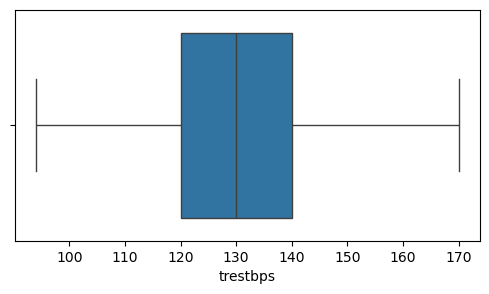

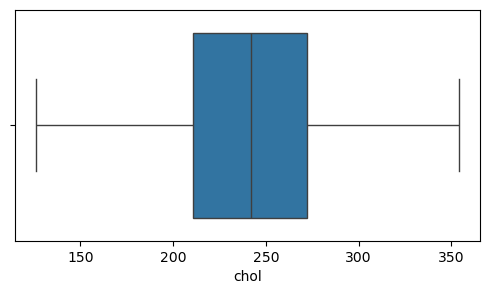

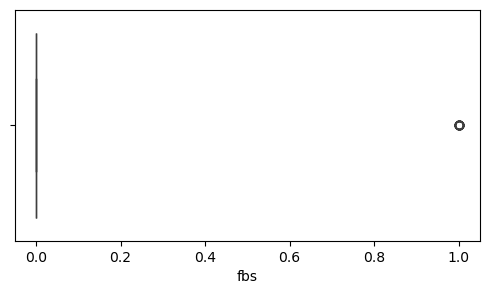

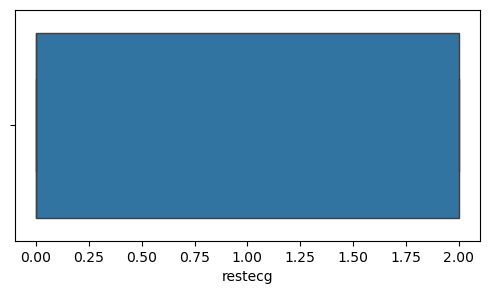

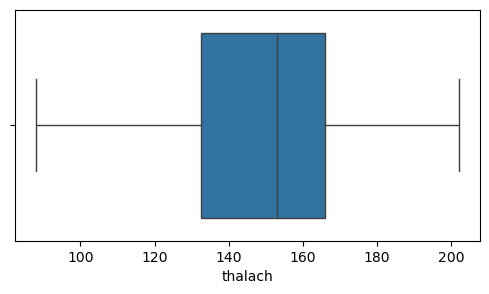

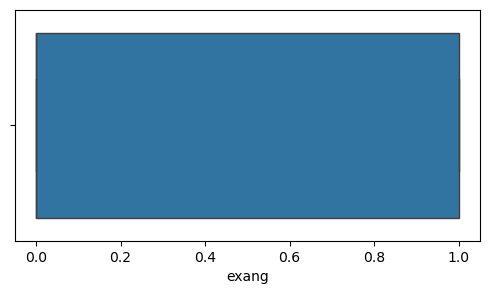

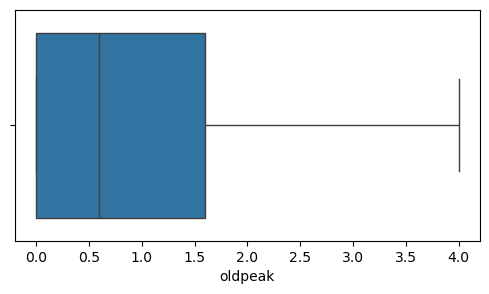

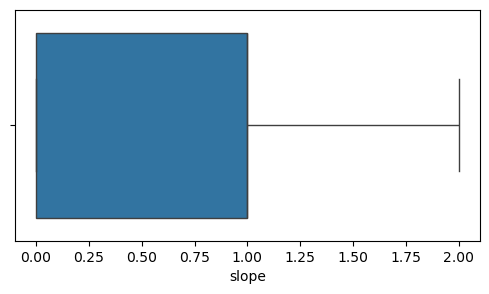

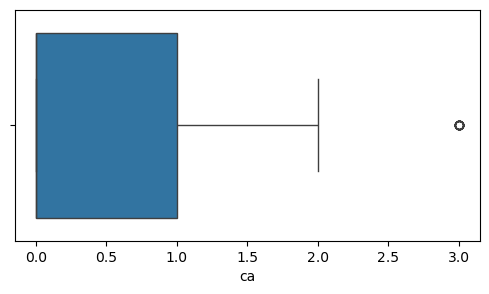

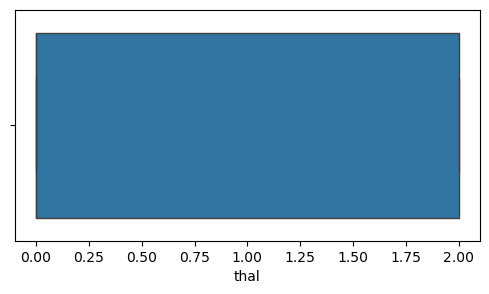

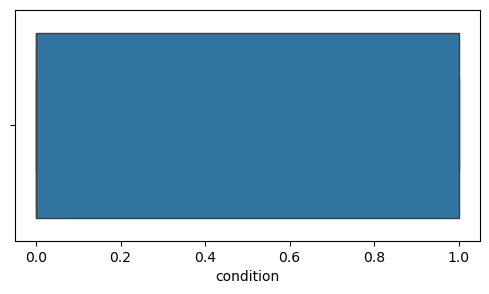

In [12]:
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["age"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["cp"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["trestbps"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["chol"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["fbs"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["restecg"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["thalach"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["exang"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["oldpeak"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["slope"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["ca"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["thal"])

pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=heart["condition"])

In [16]:
#Caracteristicas relevantes
#Condition
#El objetivo es predecir que personas tienen enfermedades cardiacas contenidas en la columna "condition"
print (heart["condition"].value_counts())

condition
0    138
1    117
Name: count, dtype: int64


In [31]:
#Datos de entrenamiento y prueba

x=heart.drop("condition",axis=1) #se cargan los datos sin las personas enfermas
y=heart["condition"] #se cargan los datos de las personas enfermas
xentrenamiento, xprueba, yentrenamiento,yprueba= train_test_split(x,y,test_size=0.40, stratify=y,random_state=0)
print (xentrenamiento)
print (xprueba)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
175   64    1   3       145   212    0        2      132      0      2.0   
174   64    1   3       120   246    0        2       96      1      2.2   
158   70    1   3       130   322    0        2      109      0      2.4   
74    70    1   2       160   269    0        0      112      1      2.9   
82    66    0   2       146   278    0        2      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
173   65    1   3       110   248    0        2      158      0      0.6   
67    41    0   1       126   306    0        0      163      0      0.0   
15    52    1   0       118   186    0        2      190      0      0.0   
164   67    1   3       120   237    0        0       71      0      1.0   
241   55    1   3       160   289    0        2      145      1      0.8   

     slope  ca  thal  
175      1   2     1  
174      2   1     0  
158      1   3    

In [32]:
regresion_logistica=LogisticRegression(solver="liblinear")
regresion_logistica.fit(xentrenamiento,yentrenamiento)
prediccion=regresion_logistica.predict(xprueba)

In [35]:
xprueba

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
240,55,1,3,132,353,0,0,132,1,1.2,1,1,2
108,54,1,2,120,258,0,2,147,0,0.4,1,0,2
138,44,0,2,118,242,0,0,149,0,0.3,1,1,0
150,39,0,2,138,220,0,0,152,0,0.0,1,0,0
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,50,1,3,144,200,0,2,126,1,0.9,1,0,2
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1
216,58,1,3,128,259,0,2,130,1,3.0,1,2,2
221,58,1,3,125,300,0,2,171,0,0.0,0,2,2


In [36]:
prediccion

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
#Evaluar el desempeño
print(classification_report(yprueba,prediccion))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.90      0.82      0.86        55

    accuracy                           0.87       119
   macro avg       0.88      0.87      0.87       119
weighted avg       0.88      0.87      0.87       119



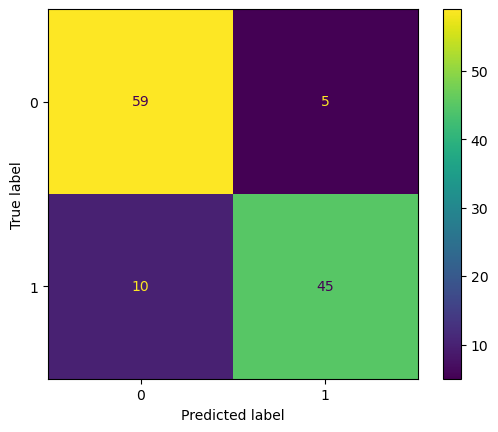

In [44]:
#matriz de confusion 
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yprueba,prediccion)).plot()

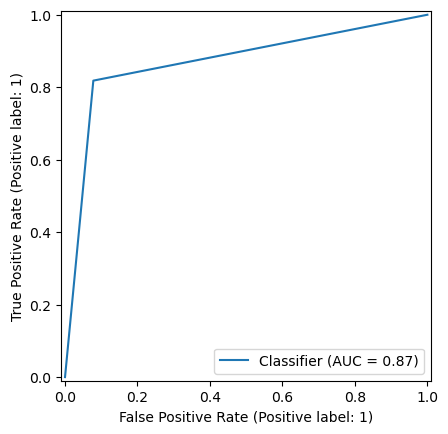

In [46]:
#curva ROC de precision
seaborn.categorical(x=heart["age"])
RocCurveDisplay.from_predictions(yprueba,prediccion)
pyplot.show()

In [47]:
#Interpretación de los resultados
# Basado en los resultados obtenidos se puede interpretar que el modelo es capaz
# de predecir correctaente las personas que tienen enferedades cardiacas, la matriz de confución
# muestra la cantidad de resultados que se predijieron correctamente, al igual que la cantidad de datos
# que se predijeron de forma equivocada. A pesar de que los resultados no muestran un total del 100% de
# predicción, se obtiene una predicción acertada del 87%, lo cual esta bastante bien,
# Si se quisiera mejorar la predicción del modelo se puede implementar una mayor cantidad de datos e implementar
# diferentes columnas categoricas para mejorar la predicción.
#Basado en el recall se puede evidenciar que tiene una muy buena distinción de casos positivos aunque no es perfecta, se acerca bastante al 100%
#Basado en la prepcición se evidencia que el modelo es capas de distinguir entre los verdaderos positivos, falsos positivos, 
#verdaderos negativos y falsos negativos 
#Basado en en F1-score que define a que metrica se le dara mas importancia, en este caso se le dara mas importancia a ,a precisión debido a 
#que el resultado es menor a 1.